In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Create the environment
env = gym.make('CartPole-v1')

# Define the number of actions and states
n_actions = env.action_space.n
n_states = env.observation_space.shape[0]

print(f"Number of actions: {n_actions}")
print(f"Number of states: {n_states}")

Number of actions: 2
Number of states: 4


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration-exploitation trade-off
episodes = 1000  # Number of episodes

# Initialize Q-table - Adjust the number of states to reflect discretization
# We're assuming 10 bins per state dimension, adjust as needed
q_table = np.zeros((10 ** n_states, n_actions))

def discretize_state(state):
    # Discretizing continuous state for simplicity
    bins = np.linspace(-2.4, 2.4, 10)
    state_indices = [np.digitize(s, bins) for s in state]
    # Ensure indices are within valid range [0, 9]
    state_indices = [min(i, 9) for i in state_indices]
    # Convert the discretized state to a single integer for indexing
    return np.ravel_multi_index(state_indices, (10, 10, 10, 10))

# Track rewards
rewards = []

for episode in range(episodes):
    state = discretize_state(env.reset())
    total_reward = 0
    done = False

    while not done:
        # Choose action: epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])  # Now 'state' is a single index

        # Take action and observe result
        next_state, reward, done, _ = env.step(action)
        next_state = discretize_state(next_state)

        # Q-value update
        best_next_action = np.argmax(q_table[next_state])
        q_table[state][action] += alpha * (reward + gamma * q_table[next_state][best_next_action] - q_table[state][action])

        state = next_state
        total_reward += reward

    rewards.append(total_reward)

print("Training completed.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Training completed.


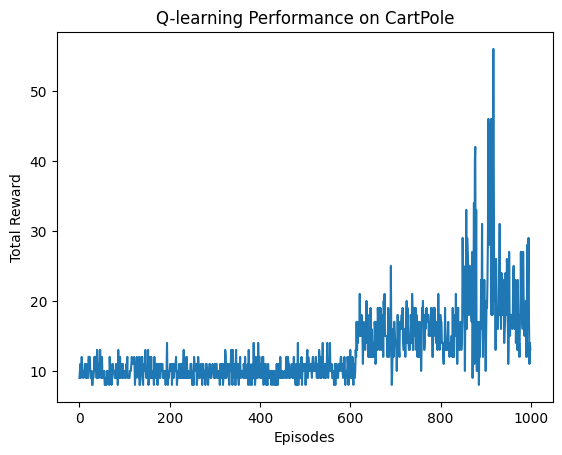

In [ ]:
# Plotting the rewards over episodes
plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Q-learning Performance on CartPole')
plt.show()


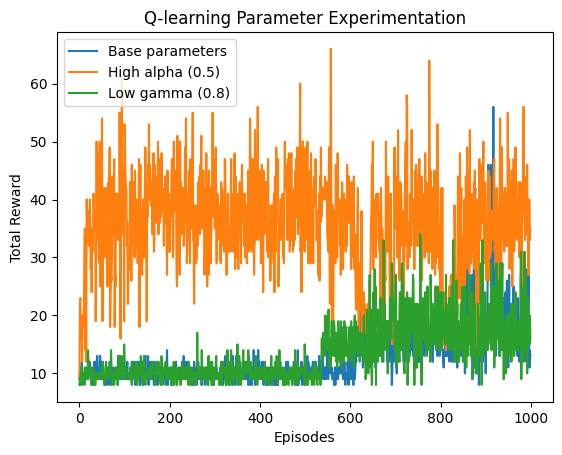

In [ ]:
def q_learning_experiment(alpha, gamma, epsilon):
    # Adjust the number of states to reflect discretization
    q_table = np.zeros((10 ** n_states, n_actions))
    rewards = []

    for episode in range(episodes):
        state = discretize_state(env.reset())
        total_reward = 0
        done = False

        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])

            next_state, reward, done, _ = env.step(action)
            next_state = discretize_state(next_state)

            best_next_action = np.argmax(q_table[next_state])
            q_table[state][action] += alpha * (reward + gamma * q_table[next_state][best_next_action] - q_table[state][action])

            state = next_state
            total_reward += reward

        rewards.append(total_reward)

    return rewards

# Run experiments with different parameters
rewards_alpha_high = q_learning_experiment(alpha=0.5, gamma=0.99, epsilon=0.1)
rewards_gamma_low = q_learning_experiment(alpha=0.1, gamma=0.8, epsilon=0.1)

# Plot the results
plt.plot(rewards, label='Base parameters')
plt.plot(rewards_alpha_high, label='High alpha (0.5)')
plt.plot(rewards_gamma_low, label='Low gamma (0.8)')
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Q-learning Parameter Experimentation')
plt.legend()
plt.show()
